<h3 style='color:orange'>Optimizer</h3>
<p>You may sometimes see the term optimizer or optimiztion function. This is simply the function that implements the backpropagation algorithm. Here's a list of a few common ones used.</p>
<ul>
<li>Gradient Descent</li>
<li>Stochastic Gradient Descent</li>
<li>Mini-Batch Gradient Descent</li>
<li>Momentum</li>
<li>Nesterov Accelerated Gradient</li>
</ul>
<p>This article explains them well.</p><a target='_blank' href='https://medium.com/@sdoshi579/optimizers-for-training-neral-network-59450d71caf6'>Here</a>

<h3 style='color:orange'>Creating a Neual Network</h3>
<a target='_blank' href='https://www.tensorflow.org/tutorials/keras/classification'>TensorFlow docs</a>

In [1]:
# Imports
import tensorflow as tf 
from tensorflow import keras 

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt 

<h3 style='color:orange'>Dataset</h3>
<p>Gor this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras. This dataset includes 60,000 images for training and 10,0000 images for validation/testing.</p>

In [3]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into testing and training


In [4]:
train_images.shape

(60000, 28, 28)

<p>We have 60000 images that are made up of 28 X 28 pixels (784 in total)</p>

In [5]:
train_images[0,23,23] # lets have a look at one pixel

194

<p>The number of that pixel stands for the gray scale number. range of 256, 0 being black and 255 being white.</p>

In [6]:
train_labels[:10] # a look at the first 10 training labels.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

<p>Our labels are integers ranging from 0-9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.</p>

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<p>Let's look at what some of these images look like!</p>

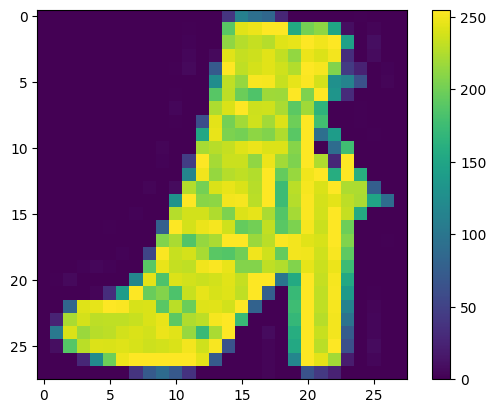

In [9]:
plt.figure()
plt.imshow(train_images[11])
plt.colorbar()
plt.grid(False)
plt.show()

<h3 style='color:orange'>Data Preprocessing</h3>
<p>The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all of our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.</p>

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

<h3 style='color:orange'>Building the Model</h3>
<p>Now it's time to build the model! We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). </p>

In [17]:
mattsModel = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

<p><b>Layer 1:</b> This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in that shape. The flatten means that our layer will reshape the shape (28, 28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.</p>
<p><b>Layer 2:</b> This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.</p>
<p><b>Layer 3:</b> This is our output layer and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represents the probability of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probability distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probability of the image being that class.</p>

<h3 style='color:orange'>Compile the Model</h3>
<p>The last step in building the model is to define the loss function, optimizer and metrics we would like to track.</p>

In [18]:
mattsModel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h3 style='color:orange'>Training the Model</h3>


In [19]:
mattsModel.fit(train_images, train_labels, epochs=6) # We pass the data, labels and epochs and watch the magic!

Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4952 - accuracy: 0.8256
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3713 - accuracy: 0.8644
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3350 - accuracy: 0.8776
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3106 - accuracy: 0.8856
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2920 - accuracy: 0.8921
Epoch 6/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2755 - accuracy: 0.8984


<h3 style='color:orange'>Evaluating the Model</h3>
<p>Now it's time to test/evaluate the model. We can do this quite easily using another builin method from keras.</p><p>The verbose argument is defined from the keras documentation as: 'verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar'.</p><a target='_blank' href='https://keras.io/models/sequential/'>keras.io/models/sequential</a>

In [20]:
test_loss, test_acc = mattsModel.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8792
Test accuracy: 0.8791999816894531


<p>You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as <b>overfitting</b>. And now we have a trained model that's ready to use to predict some values! My original epochs was 10.</p>

<h3 style='color:orange'>Making Predictions</h3>
<p>To make predictions we simply need to pass an array of data in the form we've specified in the input layer to <b> predict()</b> method.</p>

In [21]:
predictions = mattsModel.predict(test_images)

313/313 [==============================] - 2s 1ms/step


<p>This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.</p>

In [22]:
predictions[0]

array([1.8918061e-06, 1.0488686e-06, 9.3007327e-07, 5.6021896e-08,
       1.7247033e-06, 3.2218948e-02, 6.1879027e-06, 1.5017553e-02,
       2.7271759e-05, 9.5272440e-01], dtype=float32)

<p>If we wan't to get the value with the highest score we can use a useful function from numpy called <b><i>argmax()</i></b>. This simply returns the index of the maximium value from a numpy array.</p>

In [23]:
np.argmax(predictions[0])

9

<p>And we can check if this is correct by looking at the value of the cooresponding test label.</p>

In [31]:
test_labels[0]

9

313/313 [==============================] - 0s 1ms/step
Bag


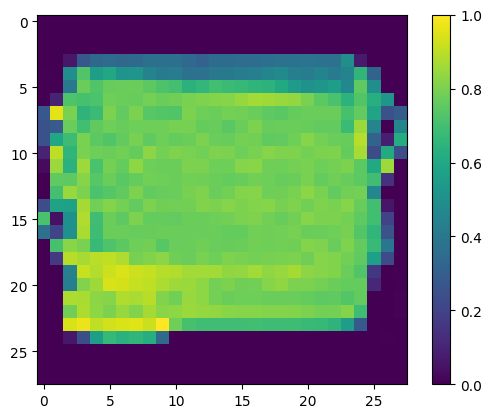

In [30]:
num = 134
predictions = mattsModel.predict(test_images)
print(class_names[np.argmax(predictions[num])])
plt.figure()
plt.imshow(test_images[num])
plt.colorbar()
plt.show()

<h3 style='color:orange'>Verifying Predictions</h3>
<p>Here is a small function to help us verify predictions with some simple visuals.</p>

1/1 [==============================] - 0s 32ms/step


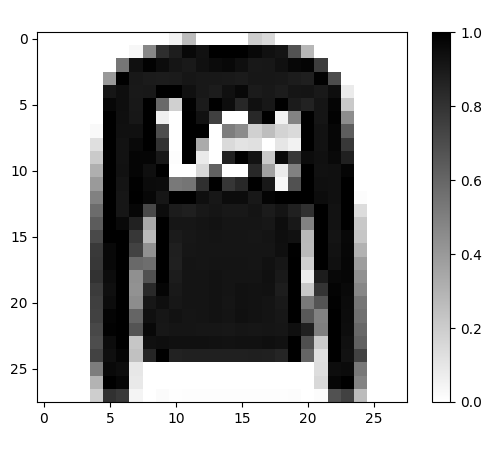

In [38]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR 
plt.rcParams['axes.labelcolor'] = COLOR 

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image, class_names[correct_label], predicted_class)
    
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title('Expected: ' + label)
    plt.xlabel('Guess: ' + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input('Pick a number: ')
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print('Try again...')
            
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(mattsModel, image, label)


<h2 style='color:red'>Deep Computer Vision</h2><p>In this guide we will learn how to perform image classification and object detection/recognition using deep computer vision with something called a <b><i>convolutional neural network</i></b>.</p><p>The goal of our convolutional neural networks will be to classify and detect images or specific objects from within the image. We will be using image data as our featrues and label for those images as our label or output.</p><p>We already know how neural networks work so we can skip through the basics and move right into explaining the following concepts.</p><ul>
<li>Image Data</li><li>Convolutional Layer</li><li>Pooling Layer</li><li>CNN Architectures</li></ul><p>The major differences we are about to see in these types of neural networks are the layers that make them up.</p>

<h3 style='color:orange'>Image Data</h3><p>So far we have dealt with pretty straight forward data that has 1 or 2 dimensions. Now we are about to deal with image data that is usually made up of 3 dimensions. These 3 dimensions are as follows:</p><ul><li>Image height</li><li>Image width</li><li>color channels</li></ul><p>The only item in the list above you may not understand is <i>color channels</i>. The number of color channels represents the depth of an image and coorelates to the colors used in it. For example, an image with three channels is likely made up of rgb (red, green, blue) pixels. So for each pixel we have three numeric values in the range 0-255 that define its color. For an image of color depth 1 we would likely have greyscale image with one value defining each pixel, again in the range of 0-255.</p>

<h3 style='color:orange'>Convolutional Neural Network</h3>
<p><b>Note:</b> We will use the term convnet and convolutional neural network interchangably.</p>
<p>Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the dense layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it. But this may sound familiar to what our densly connected neural network in the previous section was doing. Well that's because it is.</p><p>The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detects patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at ALL of the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.</p>

<h5>How they work</h5>
<p>A dense neural network learns patterns that are present in one specific area of an image. This means if a pattern that the network knows is present in a different area of the image it will have to learn the pattern again in that new area to be able to detect it.</p>

<h5>Multiple Convolutional Layers</h5><p>In our models it is quite common to have more than one convolutional layer. Even the basic example we will use in this guide will be made up of 3 convolutional layers. These layers work together by increasing complexity and abstraction at each subsequent layer. The first layer might be responsible for picking up edges and short lines, while the second layer will take as input these lines and start forming shapes or polygons. Finally the last layer might take these shapes and determine which combinations make up a specific image.</p>

<h5>Feature Maps</h5><p>feature map stands for a 3D tensor with two special axes (width and height) and one depth axis. Our convolutional layers take feature maps as their input and return a new feature map that represents the prescence of specific filters from the previous feature map. These are what we call response maps.</p>

<h5>Layer Parameters</h5><p>A convolutional layer is defined by two key parameters.</p><h5>Filters</h5><p>A filter is a m x n pattern of pixels that we are looking for in an image. The number of filters in a convolutional layer represents how many patterns each layer is looking for an what the dapth of our response map will be. If we are looking for 32 different patterns/filters than our output feature map (aka the response map) will have a depth of 32. Each one of the 32 layers of depth will be a matrix of some size containing values indicating if the filter was present at that location or not.</p><h5>Sample Size</h5><p>This isnt really the best term to describe this but each convolutional layer is going to examine n X m blocks of pixels in each image. Typically we'll consider 3X3 or 5X5 blocks.</p><p>Our layers work by sliding these filters of n X m pixels over every possible position in our image and populating a new feature map/response map indicating whether the filter is present at each location.</p>

<h3 style='color:orange'>Creating a Convnet</h3><p>This example is for the purpose of getting familiar with CNN architectures.</p><a target='_blank' href='https://www.tensorflow.org/tutorials/images/cnn'>TensorFlow Docs</a>

<h5>Dataset</h5><p>The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the <span style='color:lightblue'>CIFAR Image Dataset</span>. It contains 60,000 32X32 color images with 6000 images of each class. </p><p>The lables in this dataset are the following:</p><ul>
<li>Airplane</li><li>Automobile</li><li>Bird</li><li>Cat</li><li>Deer</li><li>Dog</li><li>Frog</li><li>Horse</li><li>Ship</li><li>Truck</li>
</ul>

In [40]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 

In [41]:
# Load and split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 24s 0us/step


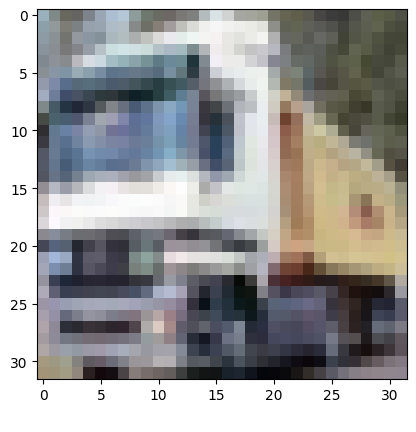

In [42]:
# let's look at an image 
IMG_INDEX = 1 # change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

<h4>CNN Architecture</h4><p>A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few densly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the prescnce of features.</p><p>We will start by building the <b>Convolutional Base</b>.</p>

In [44]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

<h4>Layer 1</h4><p>The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3X3 over our input data. We will also apply the activation function relu to the output of each convolution operation.</p><h4>Layer 2</h4><p>This layer will perform the max pooling operation using 2X2 samples and a stride of 2.</p><h4>Other Layers</h4><p>The next set of layers do very similar things but take as input the feature map from the previuous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.</p>

In [45]:
cnn_model.summary() # let's have a look at our model so far

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

<p>After looking at the summary you should notice that the depth of our image increases but the spacial dimensions reduce drastically.</p>

<h4>Adding Dense Layers</h4><p>So far we have just completed the <b>convolutional base</b>. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.</p>

In [46]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10))

In [47]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

<p>We can see that the flatten layer changes the shape of our data so that we can feed it to the 64 node dense layer, followed by the final output layer of 10 neurons (one for each class).</p>

<h4>Training</h4><p>Now we will train and compile the model using the recommended hyper parameters from tensorflow. <i>Note: This will take much longer than previous models!</i></p>

In [48]:
cnn_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

history = cnn_model.fit(train_images, train_labels, epochs=5,
                        validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 42s 26ms/step - loss: 1.5002 - accuracy: 0.4548 - val_loss: 1.1990 - val_accuracy: 0.5703
Epoch 2/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1006 - accuracy: 0.6123 - val_loss: 1.0474 - val_accuracy: 0.6342
Epoch 3/5
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9443 - accuracy: 0.6698 - val_loss: 1.0011 - val_accuracy: 0.6536
Epoch 4/5
1563/1563 [==============================] - 51s 32ms/step - loss: 0.8407 - accuracy: 0.7043 - val_loss: 0.8834 - val_accuracy: 0.6948
Epoch 5/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7689 - accuracy: 0.7317 - val_loss: 0.9061 - val_accuracy: 0.6895


<h4>Evaluating the Model</h4><p>We can determine how well the model performed by looking at it's performance on the test data set.</p>

In [49]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 0.9061 - accuracy: 0.6895 - 2s/epoch - 7ms/step
0.6894999742507935


<p>You should be getting an accuracy of about 70%. This isn't bad for a simple model like this, but we'll dive into some better approaches for computer vision below.</p>

<h4>Working with small datasets</h4><p>In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well. This is why we learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images.</p>

<h4>Data Augmentation</h4><p>To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transformations on our images so that our model can generalize better. These transfromations can be things like compressions, rotations, stretches and even color changes.</p><p>Fortunately keras can help us do this. Look at the code below to an example of data augmentation.</p>

In [51]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator 

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# pick an image to transform
test_img = train_images[14]
img = image.img_to_array(test_img) # convery image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:   # show 4 images
        break

plt.show()

AttributeError: module 'keras.preprocessing.image' has no attribute 'img_to_array'